In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
plt.rcParams["figure.figsize"]=(10,6)

In [18]:
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset.head(50)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


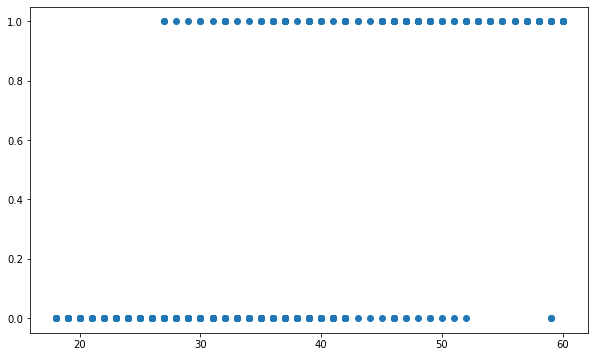

In [4]:
plt.scatter(dataset['Age'],dataset['Purchased'])
plt.show()

In [5]:
x_train,x_test,y_train,y_test = train_test_split(dataset['Age'],dataset['Purchased'],test_size=0.20)

In [25]:
# to normalize data
def normalize(X):
    return X-X.mean()

#method to predict
def predict(X,b0,b1):
    return np.array([1/(1 + exp(-1*b0 + -1*b1*x)) for x in X])

#method to train model
def logistic_regression(X,Y):                                                                                                                                                                                                                         
    X = normalize(X)
    b0=0
    b1=0
    L=0.001
    epochs=300
    
    for epoch in range(epochs):
        y_pred = predict(X,b0,b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))
        D_b1 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred)*X)
        b0 = b0 - L*D_b0
        b1 = b1 - L*D_b1
        
    return b0,b1

In [26]:
b0,b1 = logistic_regression(x_train,y_train)
print(b0,b1)

-1.064098970443652 0.23335828910502499


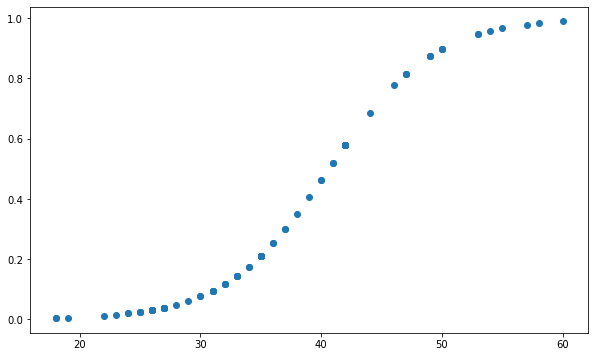

In [27]:
x_test_norm = normalize(x_test)
y_pred = predict(x_test_norm,b0,b1)
#y_pred = [1 if y >= 0.5 else 0 for y in y_pred]
plt.scatter(x_test,y_pred)

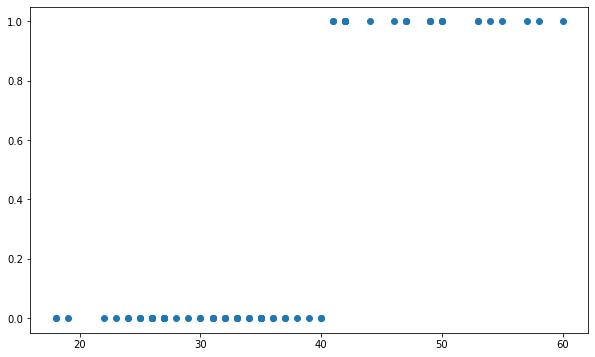

In [28]:
y_pred = [1 if y >= 0.5 else 0 for y in y_pred]
plt.scatter(x_test,y_pred)

In [32]:
accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
        accuracy+=1
print(f"Accuracy = {accuracy / len(y_pred)}")

Accuracy = 0.725


In [50]:
xx=dataset.iloc[:,2:-1]
print(xx)
yy=dataset.iloc[:,4]
print(yy)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [51]:
from sklearn.linear_model import LogisticRegression
xxtrain,xxtest,yytrain,yytest=train_test_split(xx,yy,test_size=0.20)
log_reg = LogisticRegression()
log_reg.fit(xxtrain,yytrain)

LogisticRegression()

In [52]:
yy_pred = log_reg.predict(xxtest)
print(yy_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0]


In [54]:
model_acc = log_reg.score(xxtest,yytest)
print(model_acc)

0.7
